In [1]:
from pickle import load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.cluster import KMeansClusterer, euclidean_distance,cosine_distance
from math import log
from pickle import dump
from threading import Thread
from typing import List
from time import sleep

In [2]:
with open("df after category with tf.pcl", 'rb') as file:
    df: pd.DataFrame = load(file)

In [3]:
# X=df.drop(["category"],axis=1).copy(deep=True)
X=df.drop(["category"],axis=1).copy(deep=True)
y=df["category"]

In [4]:
max_tf=max({max(X[col]) for col in X.columns})
max_tf

27940

In [5]:
# def num_to_normal(x:int)->float:
#     try: 
#         return log(x,max_tf)
#     except: 
#         return 0 

In [6]:
# np.emath.logn(2,8)

In [7]:
# a=Thread(target=num_to_normal,args=(2,))
# a.start()
# # a.run()
# a.join(),a.is_alive(),a

In [8]:
def col_to_func(col,i):
    # print(col.value_counts())
    X[col]=X[col]/max_tf
    print(f"{i} finished")

In [9]:
threads:List[Thread]=[]

In [10]:
for i,col in enumerate( X.columns):
    # t=Thread(target=col_to_func,args=(col,i,))
    # threads.append(t)
    # t.start()
    X[col]=X[col]/max_tf
    print(f"{i} finished")

0 finished
1 finished
2 finished
3 finished
4 finished
5 finished
6 finished
7 finished
8 finished
9 finished
10 finished
11 finished
12 finished
13 finished
14 finished
15 finished
16 finished
17 finished
18 finished
19 finished
20 finished
21 finished
22 finished
23 finished
24 finished
25 finished
26 finished
27 finished
28 finished
29 finished
30 finished
31 finished
32 finished
33 finished
34 finished
35 finished
36 finished
37 finished
38 finished
39 finished
40 finished
41 finished
42 finished
43 finished
44 finished
45 finished
46 finished
47 finished
48 finished
49 finished
50 finished
51 finished
52 finished
53 finished
54 finished
55 finished
56 finished
57 finished
58 finished
59 finished
60 finished
61 finished
62 finished
63 finished
64 finished
65 finished
66 finished
67 finished
68 finished
69 finished
70 finished
71 finished
72 finished
73 finished
74 finished
75 finished
76 finished
77 finished
78 finished
79 finished
80 finished
81 finished
82 finished
83 finished
84

In [18]:
for t in threads:
    while t.is_alive():
        sleep(0.1)
    t.join()

In [19]:
len(threads)

0

In [20]:
X.to_csv("df after category with tf after normalization.csv",index=False)

In [21]:
with open("df after category with tf after normalization.pcl","wb+") as file:
    dump(X,file)

In [15]:
# X.reset_index(0).head()

In [28]:
model=KMeansClusterer(4, euclidean_distance, repeats=10,avoid_empty_clusters=False)
# model=KMeansClusterer(4, cosine_distance, repeats=10,avoid_empty_clusters=True)

clusters = model.cluster(X.to_numpy(), True)

In [29]:
# print("Clustered:", X)
print("As:", clusters)
len(clusters)

As: [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 3, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]


198

In [30]:
type(clusters)

list

(array([143.,   0.,   0.,  49.,   0.,   0.,   4.,   0.,   0.,   2.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

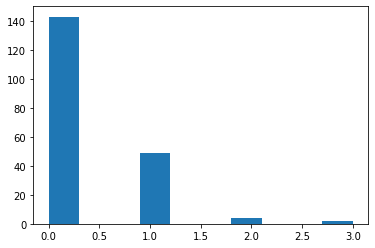

In [33]:
plt.hist(clusters)
# np.array(clusters)